In [17]:
import numpy as np
from aalpy.SULs import AutomatonSUL
from aalpy.oracles import RandomWalkEqOracle
from aalpy.learning_algs import run_Lstar
from aalpy.utils import get_Angluin_dfa
from aalpy.learning_algs import run_RPNI
from IPython.core.display import Image, display

C:\Users\diort\AppData\Local\Temp\ipykernel_18548\4176364608.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


In [22]:
def graph_dfa(dfs, path=None):
        if path is None:
                path = "temp.png"
        dfs.visualize(f"../graphs/{path}", file_type='png')
        display(Image(f"../graphs/{path}", width=1600, unconfined=True))

Hypothesis 1: 2 states.
------------------------
Prefixes / E set |()    
------------------------
()               |True  
------------------------
('a',)           |False 
------------------------
('b',)           |False 
------------------------
('a', 'a')       |True  
------------------------
('a', 'b')       |False 
------------------------
Counterexample ('b', 'a')
Hypothesis 2: 4 states.
----------------------------------------
Prefixes / E set |()    |('a',) |('b',) 
----------------------------------------
()               |True  |False  |False  
----------------------------------------
('a',)           |False |True   |False  
----------------------------------------
('b',)           |False |False  |True   
----------------------------------------
('b', 'a')       |False |False  |False  
----------------------------------------
('a', 'a')       |True  |False  |False  
----------------------------------------
('a', 'b')       |False |False  |False  
---------------------------

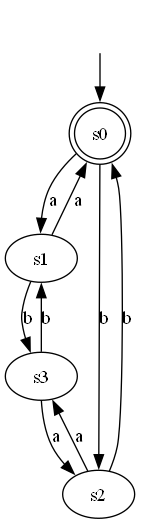

In [24]:
dfa = get_Angluin_dfa()
alphabet = dfa.get_input_alphabet()
sul = AutomatonSUL(dfa)
eq_oracle = RandomWalkEqOracle(alphabet, sul, 500)
learned_dfa = run_Lstar(alphabet, sul, eq_oracle, automaton_type='dfa',
                        cache_and_non_det_check=True, cex_processing=None, print_level=3)

graph_dfa(learned_dfa)

PTA Construction Time: 0.0
Current automaton size: 3
RPNI-GSM Learning Time: 0.0
RPNI-GSM Learned 3 state automaton.
Visualization started in the background thread.
Visualization started in the background thread.


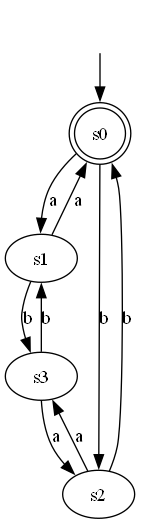

In [25]:
data = [(('a', 'a', 'a'), True),
        (('a', 'a', 'b', 'a'), True),
        (('b', 'b', 'a'), True),
        (('b', 'b', 'a', 'b', 'a'), True),
        (('a',), False),
        (('b', 'b'), False),
        (('a', 'a', 'b'), False),
        (('a', 'b', 'a'), False)]


model = run_RPNI(data, automaton_type='dfa', input_completeness='sink_state')
model.visualize()
graph_dfa(learned_dfa)
